# 5장 모델 평가와 성능 향상

### 교차 검증 : cross-validation

- 데이터를 훈련 세트와 테스트 셋트로 한번 나누기?  
- 여러번 나누자!

In [28]:
import mglearn
import numpy as np

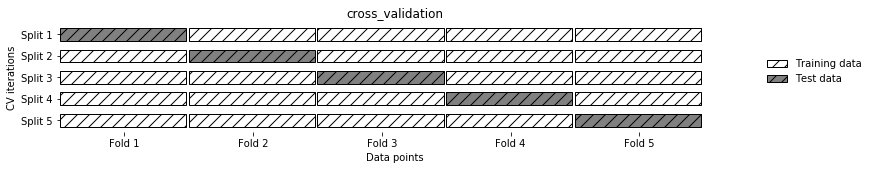

In [3]:
mglearn.plots.plot_cross_validation()

In [20]:
#p325
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris #분류
from sklearn.linear_model import LinearRegression, LogisticRegression #예측, 분류

In [21]:
iris = load_iris()
iris.data.shape, iris.target.shape  # X, Y

((150, 4), (150,))

In [22]:
model = LogisticRegression(solver='lbfgs')

In [29]:
scores = cross_val_score(model, iris.data, iris.target, cv=5) # cv : fold 몇개? 교차검증 몇번?
scores, np.mean(scores)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-pa

(array([0.86666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 0.9400000000000001)

In [31]:
from sklearn.model_selection import cross_val_score, cross_validate # score 외의 정보도 출력됩니다

In [ ]:
info = cross_validate(model, iris.data, iris.target, cv=5,  return_train_score=True)

In [38]:
import pandas as pd
pd.DataFrame(info)

,fit_time,score_time,test_score,train_score
0,0.012991,0.000000,0.866667,0.950000
1,0.012992,0.000000,0.966667,0.941667
2,0.010008,0.000999,0.933333,0.950000
3,0.009982,0.000000,0.933333,0.958333
4,0.009980,0.000000,1.000000,0.941667


## 그리드 서치

- 파라미터 : 모델이 자동으로 fitting, 사람이 정해줘야 하는 파라미터(하이퍼 파라미터 : 예 KNN의 k)
- (하이퍼) 파라미터 선정을 위한 서치

In [50]:
from sklearn.svm import SVC, SVR #분류 / 예측
model = SVC(C=0.5, gamma=0.001) 
# gamma 는 커널의 폭에 해당(폭이 넓으면 느슨하게 분류, 폭이 좁으면 세밀하게 분류
# C 규제 : 규제가 크다? 파라미터를 작게 만든다 > 모든 특징을 활용해서 예측하게 됩니다

In [51]:
cross_val_score(model, iris.data, iris.target, cv=5)

array([0.86666667, 0.96666667, 0.83333333, 0.96666667, 0.93333333])

In [55]:
C = [0.1, 1, 10, 50, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]

In [59]:
# for 문으로 최적의 하이퍼 파라미터를 찾아보자
maximum = -1
best_g_c = 0
for g in gamma:
    for c in C:        
        model = SVC(C=c, gamma=g)
        scores = cross_val_score(model, iris.data, iris.target, cv=5)        
        #print('Gamma',g, 'C', c, np.mean(scores))
        if np.mean(scores) > maximum:
            maximum = np.mean(scores)
            best_g_c = (g, c)
print('best_g_c', best_g_c, maximum)

best_g_c (0.01, 50) 0.9866666666666667


In [61]:
#343 모델의 성능 가산점 90%, 95%
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {'C': [0.1, 1, 10, 50, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10] } #dict
gird_search = GridSearchCV(SVC(), param_grid, return_train_score=True)

In [71]:
gird_search = gird_search.fit(iris.data, iris.target)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
gird_search.best_estimator_ # 최적의 하이퍼파라미터

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
df = pd.DataFrame(gird_search.cv_results_)
df.shape

(25, 18)

In [76]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001003,0.000006,0.000332,0.000470,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.901961,0.901961,0.937500,0.913333,0.016578,22,0.919192,0.949495,0.892157,0.920281,0.023421
1,0.000666,0.000471,0.000000,0.000000,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.901961,0.901961,0.937500,0.913333,0.016578,22,0.919192,0.949495,0.892157,0.920281,0.023421
2,0.000666,0.000471,0.000333,0.000471,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.921569,0.921569,0.937500,0.926667,0.007432,21,0.939394,0.959596,0.892157,0.930382,0.028260
3,0.000000,0.000000,0.000666,0.000471,0.1,1,"{'C': 0.1, 'gamma': 1}",0.960784,0.960784,0.979167,0.966667,0.008575,9,0.969697,0.989899,0.931373,0.963656,0.024272
4,0.000675,0.000477,0.000336,0.000476,0.1,10,"{'C': 0.1, 'gamma': 10}",0.686275,0.705882,0.916667,0.766667,0.103216,25,0.848485,0.909091,0.911765,0.889780,0.029221


In [79]:
#347 그리드 서치 성능을 그림으로
scores = np.array(df['mean_test_score']).reshape(5,5)

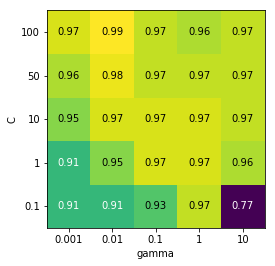

In [86]:
p = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                      xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])

In [113]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_split': [0.5, 1.0] } 
#max_depth 최대 높이, 최소 몇개의 샘플이 있어야 분기되느냐(나뭇 가지 edge 가 나뉘느냐)
gird_search = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score=True)
gird_search = gird_search.fit(iris.data, iris.target)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [114]:
gird_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
df = pd.DataFrame(gird_search.cv_results_)

In [117]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000333,0.000471,0.000333,0.000471,1,0.5,"{'max_depth': 1, 'min_samples_split': 0.5}",0.666667,0.666667,0.666667,0.666667,0.000000,6,0.666667,0.666667,0.666667,0.666667,0.000000
1,0.000336,0.000475,0.000335,0.000474,1,1,"{'max_depth': 1, 'min_samples_split': 1.0}",0.666667,0.666667,0.666667,0.666667,0.000000,6,0.666667,0.666667,0.666667,0.666667,0.000000
2,0.000333,0.000470,0.000333,0.000471,2,0.5,"{'max_depth': 2, 'min_samples_split': 0.5}",0.960784,0.901961,0.979167,0.946667,0.032944,1,0.949495,0.989899,0.950980,0.963458,0.018706
3,0.000000,0.000000,0.000000,0.000000,2,1,"{'max_depth': 2, 'min_samples_split': 1.0}",0.666667,0.666667,0.666667,0.666667,0.000000,6,0.666667,0.666667,0.666667,0.666667,0.000000
4,0.000333,0.000471,0.000000,0.000000,3,0.5,"{'max_depth': 3, 'min_samples_split': 0.5}",0.960784,0.901961,0.979167,0.946667,0.032944,1,0.949495,0.989899,0.950980,0.963458,0.018706


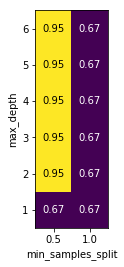

In [116]:
scores = np.array(df['mean_test_score']).reshape(-1,2)
p = mglearn.tools.heatmap(scores, xlabel='min_samples_split', ylabel='max_depth',
                      xticklabels=param_grid['min_samples_split'], yticklabels=param_grid['max_depth'])

## 에러의 종류
- 분류 : 정확도 accuracy + 오차 행렬(TP, TN, FP, FN) > 정밀도(precision)와 재현율(recall) > 조화평균(F-score)
- 회귀 : 결정계수 R^2, Absoluste Loss(L1)

#### 너목보 : 목표 : 노래 잘부르는 사람 찾기 
- 노래 잘부르는 사람 Y = 1   보통 30%
- 노래 못부르는 사람 Y = 0

In [119]:
# 클래스 불균형 상황에서는 정확도를 사용하면 안됩니다
Y = [0, 1, 0, 0, 1, 0] # 0은 음치, 1 은 노래 잘부른다

In [120]:
p1 = [0, 0, 0, 1, 1, 1]
p2 = [0, 0, 0, 0, 0, 1]
p3 = [0, 1, 0, 1, 1, 1] 

In [124]:
Y = np.array(Y)
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

누가 제일 정확하게 예측했습니까?

In [128]:
np.mean(Y == p1), np.mean(Y == p2), np.mean(Y == p3)

(0.5, 0.5, 0.6666666666666666)

In [129]:
#  metrics : 성능 지표
from sklearn.metrics import classification_report

In [142]:
#precision 정밀도, recall 재현율 
print(classification_report(Y, p1,target_names=['음치음치','노래잘함']))

              precision    recall  f1-score   support

        음치음치       0.67      0.50      0.57         4
        노래잘함       0.33      0.50      0.40         2

   micro avg       0.50      0.50      0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



In [143]:
print(classification_report(Y, p2,target_names=['음치음치','노래잘함']))

              precision    recall  f1-score   support

        음치음치       0.60      0.75      0.67         4
        노래잘함       0.00      0.00      0.00         2

   micro avg       0.50      0.50      0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



In [144]:
print(classification_report(Y, p3,target_names=['음치음치','노래잘함']))

              precision    recall  f1-score   support

        음치음치       1.00      0.50      0.67         4
        노래잘함       0.50      1.00      0.67         2

   micro avg       0.67      0.67      0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



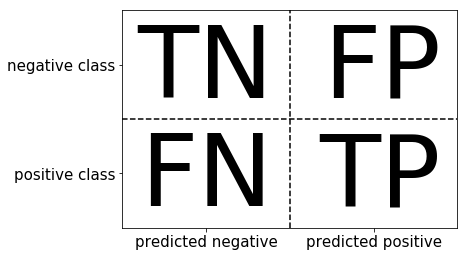

In [145]:
#362 confusion : 오차/혼동 -  오차행렬, 혼동행렬
mglearn.plots.plot_binary_confusion_matrix()

True 예측이 올바르다
False 예측이 틀렸다
Positive 예측 타겟이다 (노래잘하는 사람)
negative 예측 타겟이 아니다 (음치)
TN : 음치를 음치라고 정확히 예측한 샘플 수
FN : 노래 잘하는데 음치라고 잘못 예측한 샘플 수 
FP : 음치인데 노래잘한다고 잘못 예측한 샘플 수
TP : 노래 잘하는데 노래 잘한다고 정확히 예측한 샘플 수

정확도(Accuracy) = TP + TN / (TP + TN + FP + FN) - 클래스 균형
정밀도(Precision) = TP / (TP + FP)   - 예측이 얼마나 정확하냐
*재현율(Recall) = TP / (TP + FN)  *민감도(통계 : sensitivity), 적중률(hit rate), 진짜 양성 비율 
 - 타겟을 잘 찾았냐, 타겟을 몇퍼센트 찾았냐
 F-score : 2 * 정밀도*재현율/(정밀도+재현율) : 거의 평균과 비슷해서 별칭이 조화 평균입니다

In [146]:
from sklearn.metrics import confusion_matrix #361

In [151]:
Y, p1, print(confusion_matrix(Y, p1))

[[2 2]
 [1 1]]


(array([0, 1, 0, 0, 1, 0]), array([0, 0, 0, 1, 1, 1]), None)

정밀도-재현율 곡선과 ROC 곡선, 멀티 클래스에서의 혼동 행렬

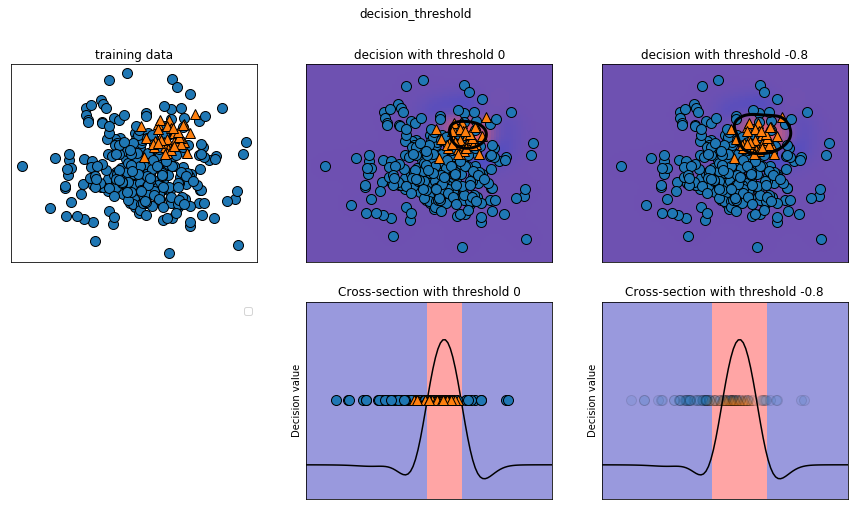

In [152]:
#368
mglearn.plots.plot_decision_threshold()

In [ ]:
#373

In [153]:
#digits 
from sklearn.datasets import load_digits

In [155]:
digit = load_digits()

In [158]:
digit.data.shape, digit.target.shape, digit.target_names # X , Y 

((1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [159]:
# 데이터 분리 없이 전부 Logistic Regression 으로 fit , score 측정 

In [ ]:
x, y = digit.data, digit.target 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x,y)
model.score(x,y) # Accuracy 분류 정확도

In [165]:
#382 혼동행렬
from sklearn.metrics import confusion_matrix

In [169]:
cm = confusion_matrix(y, model.predict(x))
print(cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 179   0   1   0   0   0   0   2   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   5   0   1   0   0   0   0 168   0]
 [  0   0   0   1   0   0   0   0   2 177]]


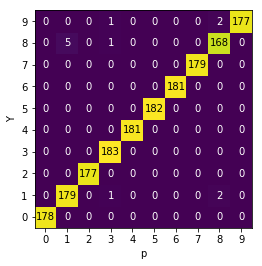

In [171]:
mglearn.tools.heatmap(cm, xlabel='p', ylabel='Y', 
                      xticklabels=digit.target_names, yticklabels=digit.target_names, fmt='%d')